# General Introduction?

## Data acquisition
We downloaded curated sequences for CD-box and HACA-box RNAs from variuos species from the SNOPY database (http://snoopy.med.miyazaki-u.ac.jp/).
You can find the sequences in the "SNOPY_CDBOX_curated.fasta" and the "SNOPY_HACABOX_curated.fasta" files, a common data format for DNA/RNA/Protein sequence data.
If working in JupyterLab you can easily inspect the .fasta files with the text editor by double-clicking the file in the "File Browser" pane on the left.
What do you notice? How could this be relevant later on?

## Data cleansing
Some species may have multiple copies of these RNAs and/or closely related species might have highly similar sequences. Having multiple highly similar or identical copies of a sequence can impede our models from learning a good generalization.
#### CD-HIT (http://weizhongli-lab.org/cd-hit/)
We will use cd-hit-est to cluster highly similar sequences and create sets of representative sequences for both classes. <br>
Verify cd-hit-est is installed and find out more about it by running "cd-hit-est -h". <br> You can run shell commands directly from jupyter code cells by prefixing the command with a "!".

In [2]:
!cd-hit-est -h

		====== CD-HIT version 4.8.1 (built on Jun  1 2021) ======

Usage: cd-hit-est [Options] 

Options

   -i	input filename in fasta format, required, can be in .gz format
   -j	input filename in fasta/fastq format for R2 reads if input are paired end (PE) files
 	 -i R1.fq -j R2.fq -o output_R1 -op output_R2 or
 	 -i R1.fa -j R2.fa -o output_R1 -op output_R2 
   -o	output filename, required
   -op	output filename for R2 reads if input are paired end (PE) files
   -c	sequence identity threshold, default 0.9
 	this is the default cd-hit's "global sequence identity" calculated as:
 	number of identical amino acids or bases in alignment
 	divided by the full length of the shorter sequence
   -G	use global sequence identity, default 1
 	if set to 0, then use local sequence identity, calculated as :
 	number of identical amino acids or bases in alignment
 	divided by the length of the alignment
 	NOTE!!! don't use -G 0 unless you use alignment coverage controls
 	see options -aL, -AL, -aS, -AS

#### CD-HIT parameters
Below are the parameters for our clustering runs. Run the cell please.

In [3]:
seq_identity = 0.9 # (-c)
word_size = 8 # recommended for 0.9 identity (-n)
threads = 0 # use all available CPUs (-T)
desc_len = 0 # keep description up until first white space (-d)

### Cluster CD-box sequences
Start by clustering the CD-box sequences. <br>
You can use variables in shell commands by enclosing them in curly braces i.e like this {variable}. <br>
You could define variables for the input file (-i) and output file (-o) parameters as well. <br>
Now run cd-hit-est using all of the defined parameters

In [4]:
cd_fasta_in = "SNOPY_CDBOX_curated.fasta" # (-i)
cd_clustered = "SNOPY_CDBOX_clustered.fasta" # (-o)

!cd-hit-est -i {cd_fasta_in} -o {cd_clustered} -c {seq_identity} -n {word_size} -T {threads} -d {desc_len}

Program: CD-HIT, V4.8.1 (+OpenMP), Jun 01 2021, 15:43:47
Command: cd-hit-est -i SNOPY_CDBOX_curated.fasta -o
         SNOPY_CDBOX_clustered.fasta -c 0.9 -n 8 -T 0 -d 0

Started: Mon Mar 21 15:24:43 2022
                            Output                              
----------------------------------------------------------------
total number of CPUs in the system is 72
Actual number of CPUs to be used: 72

total seq: 826
longest and shortest : 421 and 29
Total letters: 81726
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 72 X 12M = 874M
Table           : 2 X 1M = 2M
Miscellaneous   : 0M
Total           : 876M


Fatal Error:
not enough memory, please set -M option greater than 976

Program halted !!



### Cluster HACA-box sequences
Repeat the steps for the HACA-box sequences

In [5]:
haca_fasta_in = "SNOPY_HACABOX_curated.fasta"
haca_clustered = "SNOPY_HACABOX_clustered.fasta"

!cd-hit-est -i {haca_fasta_in} -o {haca_clustered} -c {seq_identity} -n {word_size} -T {threads} -d {desc_len}

Program: CD-HIT, V4.8.1 (+OpenMP), Jun 01 2021, 15:43:47
Command: cd-hit-est -i SNOPY_HACABOX_curated.fasta -o
         SNOPY_HACABOX_clustered.fasta -c 0.9 -n 8 -T 0 -d 0

Started: Mon Mar 21 15:24:44 2022
                            Output                              
----------------------------------------------------------------
total number of CPUs in the system is 72
Actual number of CPUs to be used: 72

total seq: 571
longest and shortest : 1004 and 42
Total letters: 81189
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 72 X 12M = 882M
Table           : 2 X 1M = 2M
Miscellaneous   : 0M
Total           : 885M


Fatal Error:
not enough memory, please set -M option greater than 985

Program halted !!



# Data inspection

## Read in the sequences
We are now ready to read in the two sets of representative sequences. <br>
The output of cd-hit-est are .fasta files again. We can use the "parse" function from the SeqIO module from Biopython (https://biopython.org/wiki/SeqIO) to read sequences and identifiers from the fasta file.
(Since we are only dealing with two files following exactly the same format you could also easily roll your own fasta reader.) <br>
The pandas library is a powerful friend when handling data (https://pandas-docs.github.io/pandas-docs-travis/index.html).<br>
Create two pandas DataFrames (for each class) with the identifier as index and one column named "Seq" for the sequence. <br>
(You could f.e. put all sequences into a dictionary, which can then be read into a pandas DataFrame)<br> 


In [6]:
# read in seqs into two dicts
from Bio import SeqIO # to read fasta

dict_cd = {record.id: str(record.seq).upper() for record in SeqIO.parse(cd_clustered, "fasta")}
dict_haca = {record.id: str(record.seq).upper() for record in SeqIO.parse(haca_clustered, "fasta")}

In [7]:
# create two DataFrames from the dicts
import pandas as pd

df_cd = pd.DataFrame.from_dict(dict_cd, orient="index", columns=["Seq"])
df_haca = pd.DataFrame.from_dict(dict_haca, orient="index", columns=["Seq"])

In [8]:
df_cd

,Seq
Arabidopsis_thaliana300001_SnoR1b,GGCGAGGATGAATAATGCTAAATTTCTGACACCTCTTGTATGAGGA...
Arabidopsis_thaliana300003_SnoR10-1,AGAAATGATGAGAAATCAGATAAATCTTAGGACACCTTCTGACACA...
Arabidopsis_thaliana300004_SnoR10-2,AAATATGATGATAATAATCAGTAAATATCTTAGGACACCTTCTGAC...
Arabidopsis_thaliana300006_SnoR101,GGGATACACTTGATCTCTGAACTTCACAGGTAAGTTCGCTTGTTGA...
Arabidopsis_thaliana300007_SnoR102,AGAAGTCAATAGACCAGACATTGTGGTAACACTCTCTTTCATGGCA...
...,...
Saccharomyces_cerevisiae300071_snR54,TAAGATGATGATCAACTTTTTATATCAATAACTTTCGTTCTACTGA...
Saccharomyces_cerevisiae300072_U24,TCAAATGATGTAATAACATATTTGCTACTTCAGATGGAACTTTGAG...
Saccharomyces_cerevisiae300074_U3a,GTCGACGTACTTCATAGGATCATTTCTATAGGAATCGTCACTCTTT...
Saccharomyces_cerevisiae300075_snR59,CTTAATGATGAAAACTATTCCTTATTCTCGACTAGTCTTTGACAAT...


Add a column "Label" to both DataFrames containing the respective class label "CD-box" or "HACA-box"

In [9]:
df_cd["Label"] = "CD-box"
df_cd

,Seq,Label
Arabidopsis_thaliana300001_SnoR1b,GGCGAGGATGAATAATGCTAAATTTCTGACACCTCTTGTATGAGGA...,CD-box
Arabidopsis_thaliana300003_SnoR10-1,AGAAATGATGAGAAATCAGATAAATCTTAGGACACCTTCTGACACA...,CD-box
Arabidopsis_thaliana300004_SnoR10-2,AAATATGATGATAATAATCAGTAAATATCTTAGGACACCTTCTGAC...,CD-box
Arabidopsis_thaliana300006_SnoR101,GGGATACACTTGATCTCTGAACTTCACAGGTAAGTTCGCTTGTTGA...,CD-box
Arabidopsis_thaliana300007_SnoR102,AGAAGTCAATAGACCAGACATTGTGGTAACACTCTCTTTCATGGCA...,CD-box
...,...,...
Saccharomyces_cerevisiae300071_snR54,TAAGATGATGATCAACTTTTTATATCAATAACTTTCGTTCTACTGA...,CD-box
Saccharomyces_cerevisiae300072_U24,TCAAATGATGTAATAACATATTTGCTACTTCAGATGGAACTTTGAG...,CD-box
Saccharomyces_cerevisiae300074_U3a,GTCGACGTACTTCATAGGATCATTTCTATAGGAATCGTCACTCTTT...,CD-box
Saccharomyces_cerevisiae300075_snR59,CTTAATGATGAAAACTATTCCTTATTCTCGACTAGTCTTTGACAAT...,CD-box


In [10]:
df_haca["Label"] = "HACA-box"
df_haca

,Seq,Label
Arabidopsis_thaliana300005_SnoR100,GAATGATTGTAGCATGGTACTGTGCACGGAAACTGAATCATGGGTT...,HACA-box
Arabidopsis_thaliana300008_SnoR103,CGCAAGTATGTGTTTCTGCTGTAAATATGGACGTATAATGATATGT...,HACA-box
Arabidopsis_thaliana300009_SnoR104,GGGGAGCATCAAAGAGTTGTGATGTTATCTGATACAATCTTCCTAA...,HACA-box
Arabidopsis_thaliana300014_SnoR109,CGGCTGTAGCTAGATTGAATAAGAAGCTATCTGGCCGGTGGTCGCG...,HACA-box
Arabidopsis_thaliana300016_SnoR110,GCTAAATTTAGTGCCGCCTTGTCTTTTCAAGTTTTCTCCTTTTGTA...,HACA-box
...,...,...
Saccharomyces_cerevisiae300063_snR35,ATACAAAATTAATCGTGCGGATTAATAATCCAGGACTATAAAACCG...,HACA-box
Saccharomyces_cerevisiae300064_snR5,ATCATTCAATAAACTGATCTTCCGGATTACCATGCTTAAGACATCA...,HACA-box
Saccharomyces_cerevisiae300065_snR9,GGGAATATAATACTAAATACTCTGTTATATAGAACTTTCTACGCCT...,HACA-box
Saccharomyces_cerevisiae300070_snR44,CTCCGGGCTGATAACTAGATGGTGTGATCGGGCAGTATACTAATTT...,HACA-box


Combine both DataFrames to create our complete data set. (Save the resulting DataFrame to a csv file)

In [11]:
df_all = pd.concat([df_cd, df_haca], axis=0)
df_all

,Seq,Label
Arabidopsis_thaliana300001_SnoR1b,GGCGAGGATGAATAATGCTAAATTTCTGACACCTCTTGTATGAGGA...,CD-box
Arabidopsis_thaliana300003_SnoR10-1,AGAAATGATGAGAAATCAGATAAATCTTAGGACACCTTCTGACACA...,CD-box
Arabidopsis_thaliana300004_SnoR10-2,AAATATGATGATAATAATCAGTAAATATCTTAGGACACCTTCTGAC...,CD-box
Arabidopsis_thaliana300006_SnoR101,GGGATACACTTGATCTCTGAACTTCACAGGTAAGTTCGCTTGTTGA...,CD-box
Arabidopsis_thaliana300007_SnoR102,AGAAGTCAATAGACCAGACATTGTGGTAACACTCTCTTTCATGGCA...,CD-box
...,...,...
Saccharomyces_cerevisiae300063_snR35,ATACAAAATTAATCGTGCGGATTAATAATCCAGGACTATAAAACCG...,HACA-box
Saccharomyces_cerevisiae300064_snR5,ATCATTCAATAAACTGATCTTCCGGATTACCATGCTTAAGACATCA...,HACA-box
Saccharomyces_cerevisiae300065_snR9,GGGAATATAATACTAAATACTCTGTTATATAGAACTTTCTACGCCT...,HACA-box
Saccharomyces_cerevisiae300070_snR44,CTCCGGGCTGATAACTAGATGGTGTGATCGGGCAGTATACTAATTT...,HACA-box


Let's add some features to generate a first impression of our data. <br>
Add a column "Length" containing the length of the sequence

In [12]:
df_all["Length"] = df_all.Seq.map(len)

Two commonly used features for DNA sequences are the "GC content" and the "ATGC ratio".<br>
The GC content is the percentage of "G"s or "C"s in the whole sequence. <br>
The ATGC ratio is the ratio of "A"s and "T"s to "G"s and "C"s. <br>
Create two columns "GC_content" and "ATGC_ratio" containing the respective feature.

In [13]:
df_all["GC_content"] = df_all.Seq.map( lambda x: (x.count("G") + x.count("C")) / len(x) )
df_all["ATGC_ratio"] = df_all.Seq.map( lambda x: (x.count("A") + x.count("T")) / (x.count("G") + x.count("C")) )

Generate a first overview of the data using the DataFrame's describe() method

In [14]:
df_all.describe()

,Length,GC_content,ATGC_ratio
count,1172.000000,1172.000000,1172.000000
mean,118.895051,0.417389,1.472921
std,57.874464,0.073975,0.449738
min,29.000000,0.220779,0.380435
25%,79.000000,0.364123,1.149734
50%,115.000000,0.415485,1.406829
75%,135.250000,0.465174,1.746324
max,1004.000000,0.724409,3.529412


We are also interested in the differences between our classes.<br>
<b>Generate a class-wise description using groupby() and describe()<b>

In [15]:
df_all.groupby("Label").describe()

Length                                                            \
          count        mean        std   min    25%    50%    75%     max   
Label                                                                       
CD-box    680.0  100.876471  50.334428  29.0   73.0   82.0  101.0   421.0   
HACA-box  492.0  143.798780  58.424932  42.0  128.0  134.0  140.0  1004.0   

         GC_content            ...                     ATGC_ratio            \
              count      mean  ...       75%       max      count      mean   
Label                          ...                                            
CD-box        680.0  0.404823  ...  0.450704  0.711340      680.0  1.550262   
HACA-box      492.0  0.434756  ...  0.483737  0.724409      492.0  1.366027   

                                                                      
               std       min       25%       50%       75%       max  
Label                                                                 
CD-box    0.465136  0.405797  1.218750  1.485667  1.821429  3.529412  
HACA-box  0.404303  0.380435  1.067243  1.316986  1.650543  3.138889  

[2 rows x 24 columns]

To get a visual impression of the distribution of the features in our data we can use the pairplot() function form the seaborn visualization library (https://seaborn.pydata.org/) <br>
Generate a pair plot for the DataFrame. What is easily visible using the plot?

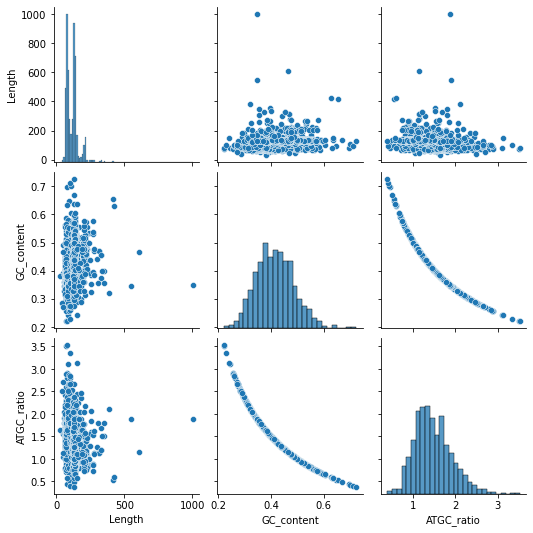

In [16]:
import seaborn as sns # Seaborn visualization library (for pairs plot)
sns.pairplot(df_all)

Again we are also interested in the differences between the two classes.<br>
<b>Generate a pair plot colored by class (Label) (https://seaborn.pydata.org/generated/seaborn.pairplot.html)<b>

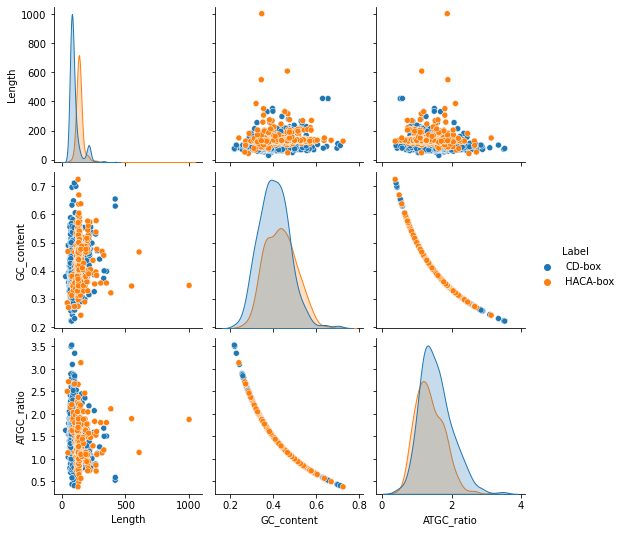

In [17]:
sns.pairplot(df_all, hue = 'Label')

Let's save the DataFrame to a csv in case we need it later

In [18]:
df_all.to_csv("df_ALL.csv")

We already noticed above (using describe) that we have a few more CD-box sequences than HACA-box sequences. <br>
To balance our dataset we can use the "resample" function from scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html).<br>
<b>Downsample the larger class to the size of the smaller class and create a new balanced DataFrame.</b>

In [19]:
from sklearn.utils import resample
rnd_seed=42

# We are going to remove the randomly selected sequences
df_cd_ds = resample(df_cd, 
                    replace=False,          # sample without replacement
                    n_samples=len(df_cd) - len(df_haca), # class size difference
                    random_state=rnd_seed)  # fix seed for reproducible results

df_balanced = df_all.drop(index=df_cd_ds.index) # drop the selected sequences
df_balanced.Label.value_counts()

HACA-box    492
CD-box      492
Name: Label, dtype: int64

The sampling procedure should leave us with a representative sample, but let us check that we didn't end up with a skewed sample anyways.<br>
<b>Use groupby(), describe() and element-wise substraction to analyse the differences between the balanced and the original data.</b>

In [20]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df_balanced.groupby("Label").describe() - df_all.groupby("Label").describe()

Length                                                 GC_content                                                           ATGC_ratio                                                            
          count      mean       std   min   25%  50%   75%  max      count     mean      std  min       25%       50%       75%  max      count      mean       std  min       25%       50%       75%  max
Label                                                                                                                                                                                                      
CD-box   -188.0  1.038164  1.554895  22.0  0.75  0.0  1.25  0.0     -188.0  0.00375  0.00058  0.0  0.003204  0.004344  0.002373  0.0     -188.0 -0.024679 -0.011034  0.0 -0.011619 -0.026528 -0.025275  0.0
HACA-box    0.0  0.000000  0.000000   0.0  0.00  0.0  0.00  0.0        0.0  0.00000  0.00000  0.0  0.000000  0.000000  0.000000  0.0        0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0

In [21]:
pd.reset_option("display")

Let's save the balanced DataFrame to a csv in case we need it later

In [22]:
df_balanced.to_csv("df_balanced.csv")

## A first simple classifier
We already noticed using the pair plot that the sequence length distributions of the two classes seem to be quite different. Can we train a simple classifier with only the features we already constructed? The performance of this classifier can then be used to establish a baseline for our upcoming more complex models (i.e CNNs).<br>
Wait! First things first. We need to split the data into a set used for training and a set used for testing.<br>
<b>Use sklearn's train_test_split to create sets of training and test data and corresponding sets of labels. Use an 80/20 split.</b>

In [23]:
from sklearn.model_selection import train_test_split
rnd_seed=42

xTrain, xTest, yTrain, yTest = train_test_split( df_balanced, df_balanced.Label, test_size=0.2, random_state=rnd_seed )

In [24]:
print(yTrain.value_counts())
print(yTest.value_counts())

HACA-box    394
CD-box      393
Name: Label, dtype: int64
CD-box      99
HACA-box    98
Name: Label, dtype: int64


Now we are going to train a "Naive Bayes" classifier using our features (https://scikit-learn.org/stable/modules/naive_bayes.html) <br>
<b>Fit a GaussianNB classifier to the training dataset and generate predictions for the test dataset. Does it make sense to include all of the features?<b>

In [25]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() # create classifier
gnb.fit(xTrain[["Length","GC_content","ATGC_ratio"]], yTrain) # train using only length and GC
yPred = gnb.predict(xTest[["Length","GC_content","ATGC_ratio"]]) # generate predictions

yPred

array(['HACA-box', 'CD-box', 'HACA-box', 'HACA-box', 'CD-box', 'HACA-box',
       'HACA-box', 'HACA-box', 'HACA-box', 'CD-box', 'CD-box', 'HACA-box',
       'HACA-box', 'HACA-box', 'HACA-box', 'CD-box', 'CD-box', 'HACA-box',
       'CD-box', 'CD-box', 'CD-box', 'CD-box', 'HACA-box', 'HACA-box',
       'HACA-box', 'CD-box', 'CD-box', 'CD-box', 'CD-box', 'CD-box',
       'CD-box', 'CD-box', 'HACA-box', 'HACA-box', 'HACA-box', 'HACA-box',
       'HACA-box', 'CD-box', 'CD-box', 'CD-box', 'HACA-box', 'CD-box',
       'CD-box', 'CD-box', 'CD-box', 'CD-box', 'HACA-box', 'CD-box',
       'HACA-box', 'CD-box', 'HACA-box', 'HACA-box', 'CD-box', 'HACA-box',
       'CD-box', 'HACA-box', 'HACA-box', 'HACA-box', 'HACA-box',
       'HACA-box', 'CD-box', 'CD-box', 'CD-box', 'CD-box', 'CD-box',
       'CD-box', 'CD-box', 'CD-box', 'CD-box', 'HACA-box', 'CD-box',
       'CD-box', 'CD-box', 'HACA-box', 'HACA-box', 'CD-box', 'HACA-box',
       'CD-box', 'HACA-box', 'CD-box', 'CD-box', 'CD-box', 'CD-box',


To assess the quality of our prediction scikit-learn provides us with many different metrics. (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)<br>
<b>Use sklearn.metrics to print out the accuracy_score and the matthews_corrcoef for the generated predictions.</b> (Are these good choices for our problem?)

In [26]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(yTest, yPred))
print("MCC:", metrics.matthews_corrcoef(yTest, yPred))

Accuracy: 0.6954314720812182
MCC: 0.3913861082992071


Scikit-learn also provides a classification report which includes commonly used metrics (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)<br>
<b>Print out the classification report for the predictions<b>

In [27]:
from sklearn.metrics import classification_report

print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

      CD-box       0.69      0.73      0.71        99
    HACA-box       0.71      0.66      0.68        98

    accuracy                           0.70       197
   macro avg       0.70      0.70      0.70       197
weighted avg       0.70      0.70      0.70       197



Another common way of looking at the confusion of a classifier is the confusion matrix.<br>
<b>Use scikit-learn to create a confusion matrix for the predictions and print it</b>

In [28]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(yTest, yPred)
conf_mat

array([[72, 27],
       [33, 65]])

Not that pretty, is it? We can use the seaborn.heatmap and matplotlib to create a matrix that is a bit more appealing to the eye.<br>
<b>Adjust the code below to generate a pretty confusion matrix<b>

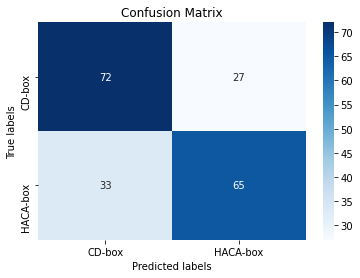

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt  

classes = ["CD-box", "HACA-box"]
df_confmat = pd.DataFrame(conf_mat, columns=df_balanced.Label.unique(), index=df_balanced.Label.unique())

ax= plt.subplot()

sns.heatmap(df_confmat, annot=True, ax=ax, cmap="Blues"); #annot=True to annotate cells

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')

plt.show()

So now that we have established a (maybe crude) baseline for our classification problem let's create a simple CNN and find out if this will improve our scores in the next notebook "02_first_CNN"